# Time Series with pandas

- DateTime Index Basics
- Time Resampling
- Time Shifting
- Rolling and Expanding
- Time Series Visualization

### DateTime Index

--- Python built-in datetime library---

In [1]:
from datetime import datetime

In [2]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

In [3]:
my_date = datetime(my_year,my_month,my_day,my_hour,my_min,my_sec)

In [4]:
print(f"""
Day: {my_date.day},
Hour: {my_date.hour},
Year: {my_date.year},
Date: {my_date})
""")


Day: 2,
Hour: 13,
Year: 2020,
Date: 2020-01-02 13:30:15)



--- Numpy datetime64 object---

In [5]:
import numpy as np

In [6]:
"""
Numpy datetime64 object:
D - day level precision
Y - Year level precision
h- Hours level precision
"""

np.array(['2020-03-15','2020-03-16','2020-03-17'], dtype='datetime64[D]')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [7]:
"""
Create Array of dates

Parameter of arange method:
From date
To date
steps or frequency
data type
"""

np.arange('2018-06-01','2018-06-23',1,dtype='datetime64[D]')

array(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
       '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
       '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12',
       '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-16',
       '2018-06-17', '2018-06-18', '2018-06-19', '2018-06-20',
       '2018-06-21', '2018-06-22'], dtype='datetime64[D]')

--- Pandas datetime object---

In [8]:
import pandas as pd

In [9]:
"""
There is a variety of date formats that pandas will recognize. For example:
- Jan 01, 2018
- 2020-01-01
The freq parameter just specifies if the periods will be yearly, daily, monthly, etc...
"""

pd.date_range('2020-01-01', periods=7,freq='Y')

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [10]:
"""
Also, you could use the format parameter to specify the date format using the pd.to_datetime() method
"""
pd.to_datetime(['1/2/2018','03/01/2018'], format='%d/%m/%Y')

DatetimeIndex(['2018-02-01', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [11]:
data = np.random.randn(3,2)
cols = ['A','B']
idx = pd.date_range('2020-01-01',periods=3,freq='Y')
df = pd.DataFrame(data,index=idx,columns=cols)
df

,A,B
2020-12-31,-0.771952,-0.747947
2021-12-31,-1.830185,1.788879
2022-12-31,0.088524,-0.069559


In [12]:
print(f"""
location of min index value: {df.index.argmax()},
{df.index.min()},
{df.index.year.min()},
{df.index.month}
{df.index.year.unique()}
""")


location of min index value: 2,
2020-12-31 00:00:00,
2020,
Int64Index([12, 12, 12], dtype='int64')
Int64Index([2020, 2021, 2022], dtype='int64')



### Time Resampling

In [13]:
from pandas_datareader import data, wb

In [26]:
start = datetime(2015,1,1)
end = datetime(2021,9,1)
df = data.DataReader('SBUX','yahoo',start,end)
df = df[['Close','Volume']]

In [28]:
df.head(3)

,Close,Volume
Date,,
2015-01-02,40.720001,6886000.0
2015-01-05,39.939999,11623800.0
2015-01-06,39.615002,7664400.0


When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [29]:
"""
The resample below means that the dataframe will take the yearly average of the columns! Since the dataset has 7 years,
you will see 7 rows only.
"""
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,53.253869,8.648356e+06
2016-12-31,56.588889,9.300222e+06
2017-12-31,57.267849,9.295893e+06
2018-12-31,57.501873,1.122824e+07
2019-12-31,81.443214,7.996700e+06
2020-12-31,82.863992,9.634834e+06
2021-12-31,111.426964,5.908343e+06


In [30]:
"""
custom re-sampling function
"""
def first_day(entry):
    if len(entry) != 0:
        return entry[0]

In [34]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,40.720001,6886000.0
2016-12-31,58.259998,13521500.0
2017-12-31,55.349998,7809300.0
2018-12-31,57.630001,7216000.0
2019-12-31,64.320000,10094000.0
2020-12-31,89.349998,6473800.0
2021-12-31,103.099998,8041500.0


<AxesSubplot:xlabel='Date'>

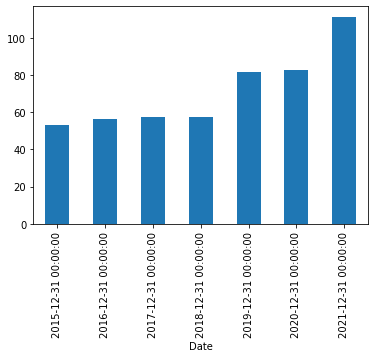

In [35]:
df['Close'].resample('A').mean().plot.bar()

### Time Shifting

In [38]:
df.head()

,Close,Volume
Date,,
2015-01-02,40.720001,6886000.0
2015-01-05,39.939999,11623800.0
2015-01-06,39.615002,7664400.0
2015-01-07,40.590000,9732600.0
2015-01-08,41.244999,13170600.0


In [40]:
"""
shift function will shift down the number of rows you decide
"""
df.shift(2)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,40.720001,6886000.0
2015-01-07,39.939999,11623800.0
2015-01-08,39.615002,7664400.0
...,...,...
2021-08-26,115.080002,3447300.0
2021-08-27,115.570000,3881500.0
2021-08-30,114.320000,5188200.0


In [41]:
df.shift(-1)

,Close,Volume
Date,,
2015-01-02,39.939999,11623800.0
2015-01-05,39.615002,7664400.0
2015-01-06,40.590000,9732600.0
2015-01-07,41.244999,13170600.0
2015-01-08,39.895000,27556800.0
...,...,...
2021-08-26,115.120003,4202900.0
2021-08-27,115.610001,3078200.0
2021-08-30,117.489998,6995500.0


In [43]:
df.shift(periods=1,freq='M').head()

,Close,Volume
Date,,
2015-01-31,40.720001,6886000.0
2015-01-31,39.939999,11623800.0
2015-01-31,39.615002,7664400.0
2015-01-31,40.590000,9732600.0
2015-01-31,41.244999,13170600.0


### Rolling and Expanding

In [52]:
import matplotlib.pyplot as plt

---Rolling---

<AxesSubplot:xlabel='Date'>

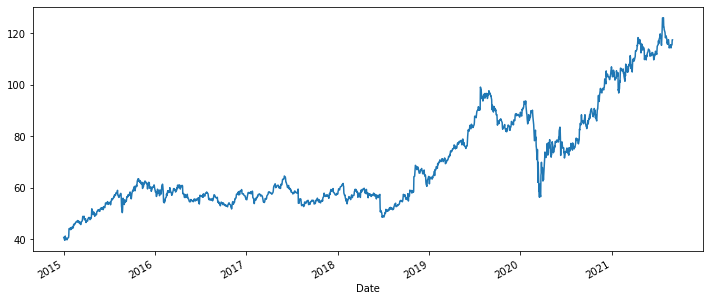

In [53]:
df['Close'].plot(figsize=(12,5))

In [67]:
"""
window is expressed in days
The first 7 will be null since we have not reached 7
"""
df.rolling(window=7).mean().head(14)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,40.302858,1.237937e+07
2015-01-13,40.262143,1.297291e+07
2015-01-14,40.300715,1.264023e+07


<AxesSubplot:xlabel='Date'>

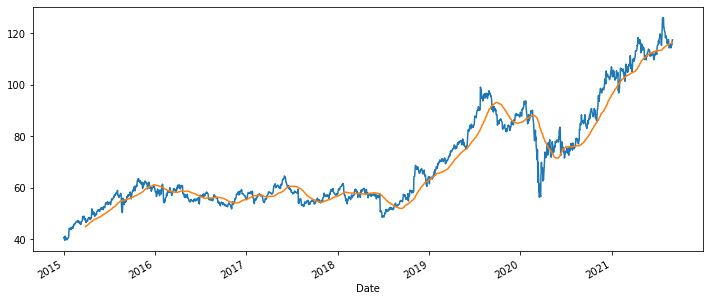

In [73]:
"""
Moving Average
it also has an argument center=True to have the window calculated centred in the middle. 
Then it looks 3 days ahead and 3 days back when your window is 7.
The default value is center=False. It just takes current day value + 6 day values back when the window is 7.
"""
df['Close'].plot(figsize=(12,5))
df.rolling(window=60).mean()['Close'].plot()

---Expanding---

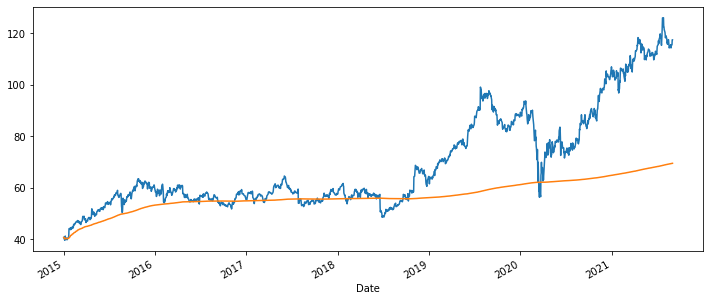

In [81]:
"""
Window keeps expanding and shows the average in the 'Y' axis... ????
See semicolon at the end of the plot. That allows getting rid of the comments of the matplotlib libraries
"""
df['Close'].plot(figsize=(12,5))
df['Close'].expanding().mean().plot(figsize=(12,5));

### Visualizing Time Series Data

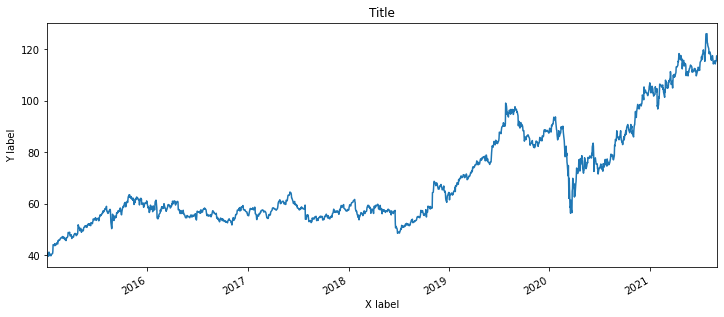

In [88]:
"""
axis parameter inside autoscale function: type x,y or both if you want autoscale based in x, y or both
"""
title = 'Title'
ylabel = 'Y label'
xlabel = 'X label'
ax = df['Close'].plot(figsize=(12,5),title = title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel);

<AxesSubplot:xlabel='Date'>

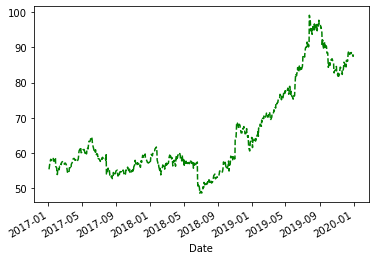

In [95]:
"""
Use datetime index to filter based on data
"""
df['Close']['2017':'2019'].plot(ls='--',c='green')

In [96]:
from matplotlib import dates

Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  

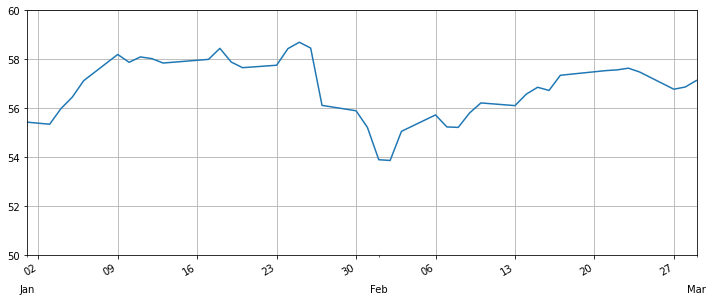

In [114]:
"""
Check link in class notebook for all dates tickers
set major locator fixes the x date scale
byweekday = 0 means 'Monday'
"""

ax =df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],figsize=(12,5));
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))


ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)